# Analysis of all the books (1-14)

In [1]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import gravis as gv
import matplotlib.pyplot as plt
import selenium

In [2]:
dir = 'C:/Users/leand/OneDrive/Desktop/Magistrale/Analisi mie/Libri/Book analysis/Books_rel'

books_datasets = []

# Per ogni file in formato csv nella cartella
for file in os.listdir(dir):

    # Controlla se il file esiste
    if os.path.isfile(os.path.join(dir, file)):

        # Apri il file in formato csv
        dataset = pd.read_csv(os.path.join(dir, file))

        # Aggiungi il dataset alla lista, insieme al suo nome
        books_datasets.append([dataset, file])


def sort_by_number(dataset_and_name):
    return int(dataset_and_name[1].split("_")[1].split(".")[0])

books_datasets.sort(key=sort_by_number)


In [3]:
values_to_drop = ['Two', 'Matrim', 'Mist', 'Three', 'The', 'Lady', 'Mother', 'Half']

for i in range(len(books_datasets)):
    for column in ['source', 'target']:
        books_datasets[i][0] = books_datasets[i][0].drop(books_datasets[i][0][books_datasets[i][0][column].isin(values_to_drop)].index)

In [4]:
books_graphs = []

for book in books_datasets:
    G = nx.from_pandas_edgelist(book[0],
                                source = "source",
                                target = "target",
                                edge_attr = "value",
                                create_using = nx.Graph())
    G.remove_nodes_from(list(nx.isolates(G)))
    books_graphs.append(G)

# Interactive graph of each book

In [6]:
# Visualize and export graphs in html
for i in range(1, len(books_graphs)):
    centrality = nx.degree_centrality(books_graphs[i])
    communities = nx.algorithms.community.louvain_communities(books_graphs[i])
    nx.set_node_attributes(books_graphs[i], centrality, 'size')
    colors = ['#fd7f6f', '#7eb0d5', '#b2e061', '#bd7ebe', '#ffb55a', '#ffee65', '#beb9db', '#fdcce5', '#8bd3c7', '#6fa6fd', '#d57e7e', 
              '#a6fd7f', '#d3a88b', '#b97fbd', '#9c6ffd', '#ffd46f', '#6fd0fd', '#d9fd7f', '#ff7f8b', '#ff9e6f', '#8bcaff', '#b46ffd']
    for community, color in zip(communities, colors):
        for node in community:
            books_graphs[i].nodes[node]['color'] = color
    graph_wot = gv.d3(books_graphs[i], use_node_size_normalization=True, node_size_normalization_max=50, 
      use_edge_size_normalization=True, edge_size_data_source='value', edge_curvature=0.3, links_force_distance=100, links_force_strength=0.15, graph_height=1200)
    graph_wot.export_html(f'graph_wot_{i}.html')

    

# Overall series graph

In [14]:
for book in books_datasets[1:]:
    merged_dataset = pd.concat([book[0]], ignore_index=True)
    result_dataset = merged_dataset.groupby(['source', 'target']).agg({'value': 'sum'}).reset_index()
    
#result_dataset.to_csv("merged_dataset.csv", index=False)

In [15]:
G = nx.from_pandas_edgelist(result_dataset,
                                source = "source",
                                target = "target",
                                edge_attr = "value",
                                create_using = nx.Graph())
G.remove_nodes_from(list(nx.isolates(G)))



In [ ]:
centrality = nx.degree_centrality(G)
communities = nx.algorithms.community.louvain_communities(G)
nx.set_node_attributes(G, centrality, 'size')
colors = ['#fd7f6f', '#7eb0d5', '#b2e061', '#bd7ebe', '#ffb55a', '#ffee65', '#beb9db', '#fdcce5', '#8bd3c7', '#6fa6fd', '#d57e7e', 
              '#a6fd7f', '#d3a88b', '#b97fbd', '#9c6ffd', '#ffd46f', '#6fd0fd', '#d9fd7f', '#ff7f8b']
for community, color in zip(communities, colors):
    for node in community:
        G.nodes[node]['color'] = color
graph_wot_total = gv.d3(G, use_node_size_normalization=True, node_size_normalization_max=50, 
      use_edge_size_normalization=True, edge_size_data_source='value', edge_curvature=0.3, links_force_distance=100, links_force_strength=0.15, graph_height=1200)

    

In [ ]:
graph_wot_total

In [20]:
graph_wot_total.export_html('wot_total.html')

# Analysis of the graph of the whole series

In [52]:
metrics_dict_all = {
    "Density": [],
    "Diameter": [],
    "Average Path Length": [],
    "Clustering Coefficient": [],
    "Average Degree": [],
    "Assortativity Coefficient": [],
    "Global Degree Centrality": [],
    "Efficiency": [],
    "Modularity Coefficient": []
}


density = nx.density(G)
diameter = nx.diameter(G)
avg_path_length = nx.average_shortest_path_length(G)
clustering_coefficient = nx.average_clustering(G)
avg_degree = sum(dict(G.degree()).values()) / len(G)
assortativity_coefficient = nx.degree_assortativity_coefficient(G)
global_degree_centrality = sum(dict(G.degree()).values())
efficiency = nx.global_efficiency(G)
modularity_coefficient = nx.community.modularity(G, [list(G.subgraph(c).nodes) for c in nx.connected_components(G)])

# Aggiungi le metriche al dizionario
metrics_dict_all["Density"].append(density)
metrics_dict_all["Diameter"].append(diameter)
metrics_dict_all["Average Path Length"].append(avg_path_length)
metrics_dict_all["Clustering Coefficient"].append(clustering_coefficient)
metrics_dict_all["Average Degree"].append(avg_degree)
metrics_dict_all["Assortativity Coefficient"].append(assortativity_coefficient)
metrics_dict_all["Global Degree Centrality"].append(global_degree_centrality)
metrics_dict_all["Efficiency"].append(efficiency)
metrics_dict_all["Modularity Coefficient"].append(modularity_coefficient)


# Crea un DataFrame da metrics_dict
df_net_metrics_all = pd.DataFrame(metrics_dict_all)



In [111]:
df_net_metrics_all

,Density,Diameter,Average Path Length,Clustering Coefficient,Average Degree,Assortativity Coefficient,Global Degree Centrality,Efficiency,Modularity Coefficient
0,0.018823,6,3.037627,0.447806,6.21148,-0.172507,2056,0.358485,0.0


In [11]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality_df = pd.DataFrame(list(degree_centrality.items()), columns=['Character', 'Degree Centrality'])
degree_centrality_df.set_index('Character', inplace=True)

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality_df = pd.DataFrame(list(betweenness_centrality.items()), columns=['Character', 'Betweenness Centrality'])
betweenness_centrality_df.set_index('Character', inplace=True)

# Closeness centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality_df = pd.DataFrame(list(closeness_centrality.items()), columns=['Character', 'Closeness Centrality'])
closeness_centrality_df.set_index('Character', inplace=True)

# Eigenvector centrality
eigen_centrality = nx.eigenvector_centrality(G)
eigen_centrality_df = pd.DataFrame(list(eigen_centrality.items()), columns=['Character', 'Eigenvector Centrality'])
eigen_centrality_df.set_index('Character', inplace=True)

Top 10 for each metric

In [54]:
degree_centrality_top10 = degree_centrality_df.sort_values(by='Degree Centrality', ascending=False).head(10)
betweenness_centrality_top10 = betweenness_centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(10)
closeness_centrality_top10 = closeness_centrality_df.sort_values(by='Closeness Centrality', ascending=False).head(10)
eigen_centrality_top10 = eigen_centrality_df.sort_values(by='Eigenvector Centrality', ascending=False).head(10)

In [13]:
# Degree centrality
print("Top 10 per Degree Centrality:")
print(degree_centrality_top10)

Top 10 per Degree Centrality:
           Degree Centrality
Character                   
Rand                0.254545
Elayne              0.227273
Egwene              0.215152
Mat                 0.160606
Lan                 0.151515
Aviendha            0.124242
Nynaeve             0.121212
Talmanes            0.115152
Demandred           0.100000
Tam                 0.100000


In [14]:
# Between Ccentrality
print("\nTop 10 per Betweenness Centrality:")
print(betweenness_centrality_top10)


Top 10 per Betweenness Centrality:
           Betweenness Centrality
Character                        
Rand                     0.213443
Elayne                   0.178868
Egwene                   0.175905
Mat                      0.125057
Lan                      0.103282
Talmanes                 0.084650
Aviendha                 0.072900
Pevara                   0.069098
Galad                    0.067537
Demandred                0.064200


In [15]:
# Closeness centrality
print("\nTop 10 per Closeness Centrality:")
print(closeness_centrality_top10)


Top 10 per Closeness Centrality:
           Closeness Centrality
Character                      
Elayne                 0.528846
Rand                   0.522979
Egwene                 0.514821
Mat                    0.491803
Lan                    0.491071
Nynaeve                0.472779
Talmanes               0.462833
Demandred              0.462185
Aviendha               0.458333
Birgitte               0.457698


In [16]:
# Eigenvector centrality
print("\nTop 10 per Eigenvector Centrality:")
print(eigen_centrality_top10)



Top 10 per Eigenvector Centrality:
           Eigenvector Centrality
Character                        
Elayne                   0.297776
Rand                     0.289463
Egwene                   0.275193
Nynaeve                  0.224835
Lan                      0.220155
Mat                      0.213132
Aviendha                 0.179807
Tam                      0.168144
Demandred                0.162829
Talmanes                 0.156315


In [119]:
def plot_top_characters_subplots(df_list, centrality_types):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    for i, (df, centrality_type) in enumerate(zip(df_list, centrality_types)):
        ax = axes.flat[i]
        ax.bar(df.index, df[centrality_type])
        ax.set_title(f"Top 10 Characters for {centrality_type}")
        

        # Retrieve and set x-ticks with rotation and alignment
        ticks = ax.get_xticks()
        ax.set_xticks(ticks, rotation=45, ha="right")
        for tick in ax.get_xticklabels():
            tick.set_fontsize(6.7)
        plt.subplots_adjust(bottom=0.85)  # Increase bottom margin for x-labels

    plt.tight_layout()
    plt.show()
    


# Centrality types corresponding to each DataFrame
centrality_types = ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Eigenvector Centrality']

# Combine DataFrames into a list
df_list = [degree_centrality_top10, betweenness_centrality_top10, closeness_centrality_top10, eigen_centrality_top10]




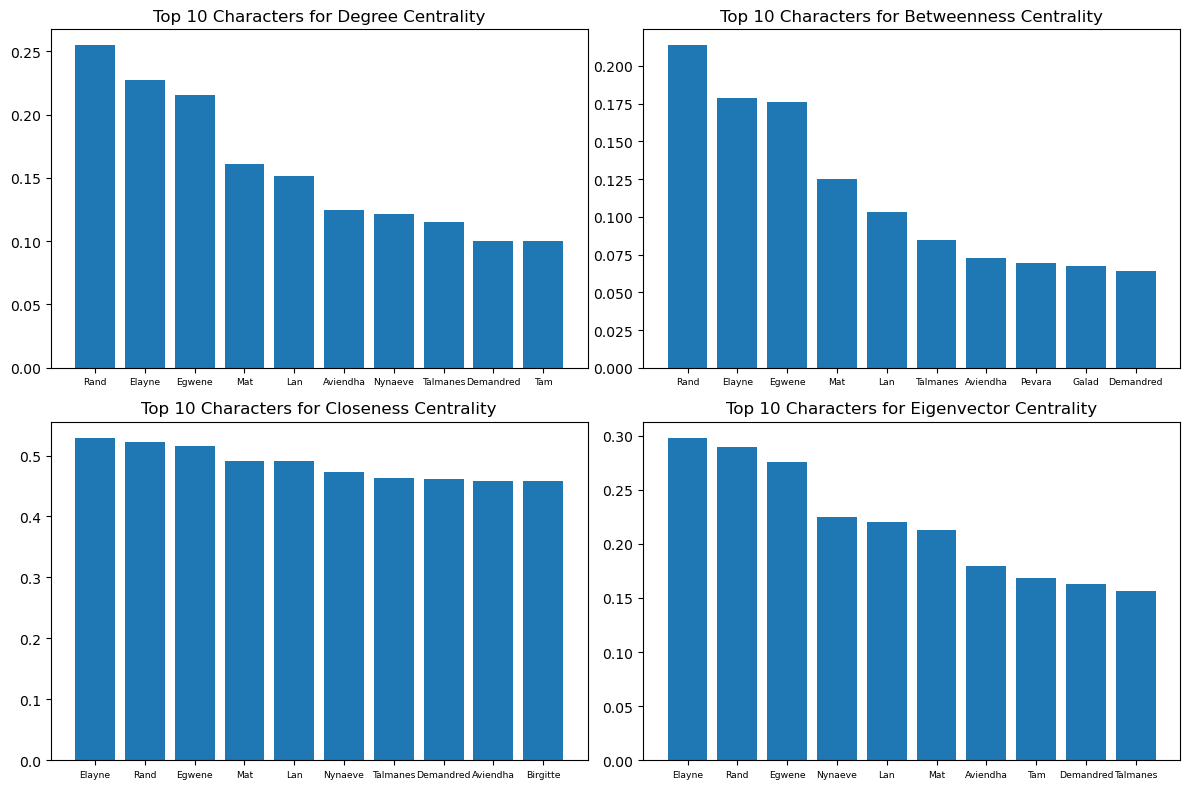

In [41]:
# Create a single plot with four quadrants
plot_top_characters_subplots(df_list, centrality_types)

In [42]:
# Dataframe of metrics
df_net_metrics_all =  degree_centrality_df.merge(betweenness_centrality_df, on='Character').merge(closeness_centrality_df, on='Character').merge(eigen_centrality_df, on='Character')


In [43]:
df_net_metrics_all

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
Character,,,,
Abell,0.021212,0.002210,0.369955,0.042229
Azi,0.006061,0.000000,0.314885,0.010130
Dannil,0.018182,0.000564,0.374150,0.046455
Trom,0.006061,0.000051,0.310442,0.008630
Agelmar,0.030303,0.002611,0.396635,0.064619
...,...,...,...,...
Kimtin,0.003030,0.000000,0.313390,0.008097
Deira,0.003030,0.000000,0.285962,0.003554
Handoin,0.003030,0.000000,0.307263,0.006746


In [44]:
main_characters = ["Rand", "Mat", "Perrin", "Nynaeve", "Egwene", "Moiraine", "Lan", "Min", "Elayne", "Faile", "Aviendha", "Tuon"]

df_subset_all = df_net_metrics_all[df_net_metrics_all.index.isin(main_characters)]

df_subset_all

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
Character,,,,
Egwene,0.215152,0.175905,0.514821,0.275193
Tuon,0.075758,0.029940,0.442953,0.140091
Aviendha,0.124242,0.072900,0.458333,0.179807
Min,0.069697,0.021825,0.425258,0.132715
Moiraine,0.063636,0.005261,0.436508,0.147184
Perrin,0.048485,0.005661,0.409938,0.096131
Rand,0.254545,0.213443,0.522979,0.289463
Nynaeve,0.121212,0.033700,0.472779,0.224835
Faile,0.084848,0.050491,0.428016,0.123292


# Structural metrics of each book 

Network metrics

In [50]:

metrics_dict = {
    "Density": [],
    #"Diameter": [],
    #"Average_Path_Length": [],
    "Clustering Coefficient": [],
    "Average Degree Centrality": [],
    "Assortativity Coefficient": [],
    "Global Degree Centrality": [],
    "Efficiency": [],
    #"Modularity_Coefficient": []
}


for i, book in enumerate(books_graphs):
    density = nx.density(book)
    #diameter = nx.diameter(book)
    #avg_path_length = nx.average_shortest_path_length(book)
    clustering_coefficient = nx.average_clustering(book)
    avg_degree = sum(dict(book.degree()).values()) / len(book)
    assortativity_coefficient = nx.degree_assortativity_coefficient(book)
    global_degree_centrality = sum(dict(book.degree()).values())
    efficiency = nx.global_efficiency(book)
    #modularity_coefficient = nx.modularity(book, [list(book.subgraph(c).nodes) for c in nx.connected_components(book)])

    
    metrics_dict["Density"].append(density)
    #metrics_dict["Diameter"].append(diameter)
    #metrics_dict["Average_Path_Length"].append(avg_path_length)
    metrics_dict["Clustering Coefficient"].append(clustering_coefficient)
    metrics_dict["Average Degree Centrality"].append(avg_degree)
    metrics_dict["Assortativity Coefficient"].append(assortativity_coefficient)
    metrics_dict["Global Degree Centrality"].append(global_degree_centrality)
    metrics_dict["Efficiency"].append(efficiency)
    #metrics_dict["Modularity_Coefficient"].append(modularity_coefficient)


df_net_metrics = pd.DataFrame(metrics_dict)


df_net_metrics["Book"] = [f"Book {i}" for i in range(len(books_graphs))]


df_net_metrics.set_index("Book", inplace=True)


In [51]:
# Dataframe
df_net_metrics[1:]

,Density,Clustering Coefficient,Average Degree Centrality,Assortativity Coefficient,Global Degree Centrality,Efficiency
Book,,,,,,
Book 1,0.054011,0.486127,6.859375,-0.286443,878,0.433204
Book 2,0.039031,0.494013,6.283951,-0.240708,1018,0.382338
Book 3,0.043337,0.467379,6.153846,-0.317205,880,0.402648
Book 4,0.025243,0.415967,7.800000,-0.072507,2418,0.330018
Book 5,0.029339,0.472373,8.185714,-0.171508,2292,0.376634
Book 6,0.016187,0.432784,7.591489,-0.152046,3568,0.352474
Book 7,0.020164,0.414481,7.238889,-0.118784,2606,0.343539
Book 8,0.021769,0.471352,6.400000,-0.085479,1888,0.321220
Book 9,0.018715,0.409363,6.250746,-0.091092,2094,0.316122


# Overall analysis of all the characters in each book from book one

In [68]:
main_characters = ["Rand", "Mat", "Perrin", "Nynaeve", "Egwene", "Moiraine", "Lan", "Min", "Elayne", "Faile", "Aviendha", "Tuon"]
book_labels = ["Book " + str(i + 1) for i in range(len(books_graphs[1:]))]

# Degree centrality
evol_centrality = [nx.degree_centrality(book) for book in books_graphs[1:]]
evol_centrality_df = pd.DataFrame.from_records(evol_centrality)
evol_centrality_df.index = book_labels
evol_centrality_main = evol_centrality_df.filter(items=main_characters)

# Betweenness centrality
evol_betweenness = [nx.betweenness_centrality(book) for book in books_graphs[1:]]
evol_betweenness_df = pd.DataFrame.from_records(evol_betweenness)
evol_betweenness_df.index = book_labels
evol_betweenness_main = evol_betweenness_df.filter(items=main_characters)

# Closeness centrality
evol_closeness = [nx.closeness_centrality(book) for book in books_graphs[1:]]
evol_closeness_df = pd.DataFrame.from_records(evol_closeness)
evol_closeness_df.index = book_labels
evol_closeness_main = evol_closeness_df.filter(items=main_characters)

# Eigenvector centrality
evol_eigen = [nx.eigenvector_centrality(book) for book in books_graphs[1:]]
evol_eigen_df = pd.DataFrame.from_records(evol_eigen)
evol_eigen_df.index = book_labels
evol_eigen_main = evol_eigen_df.filter(items=main_characters)

Degree Centrality

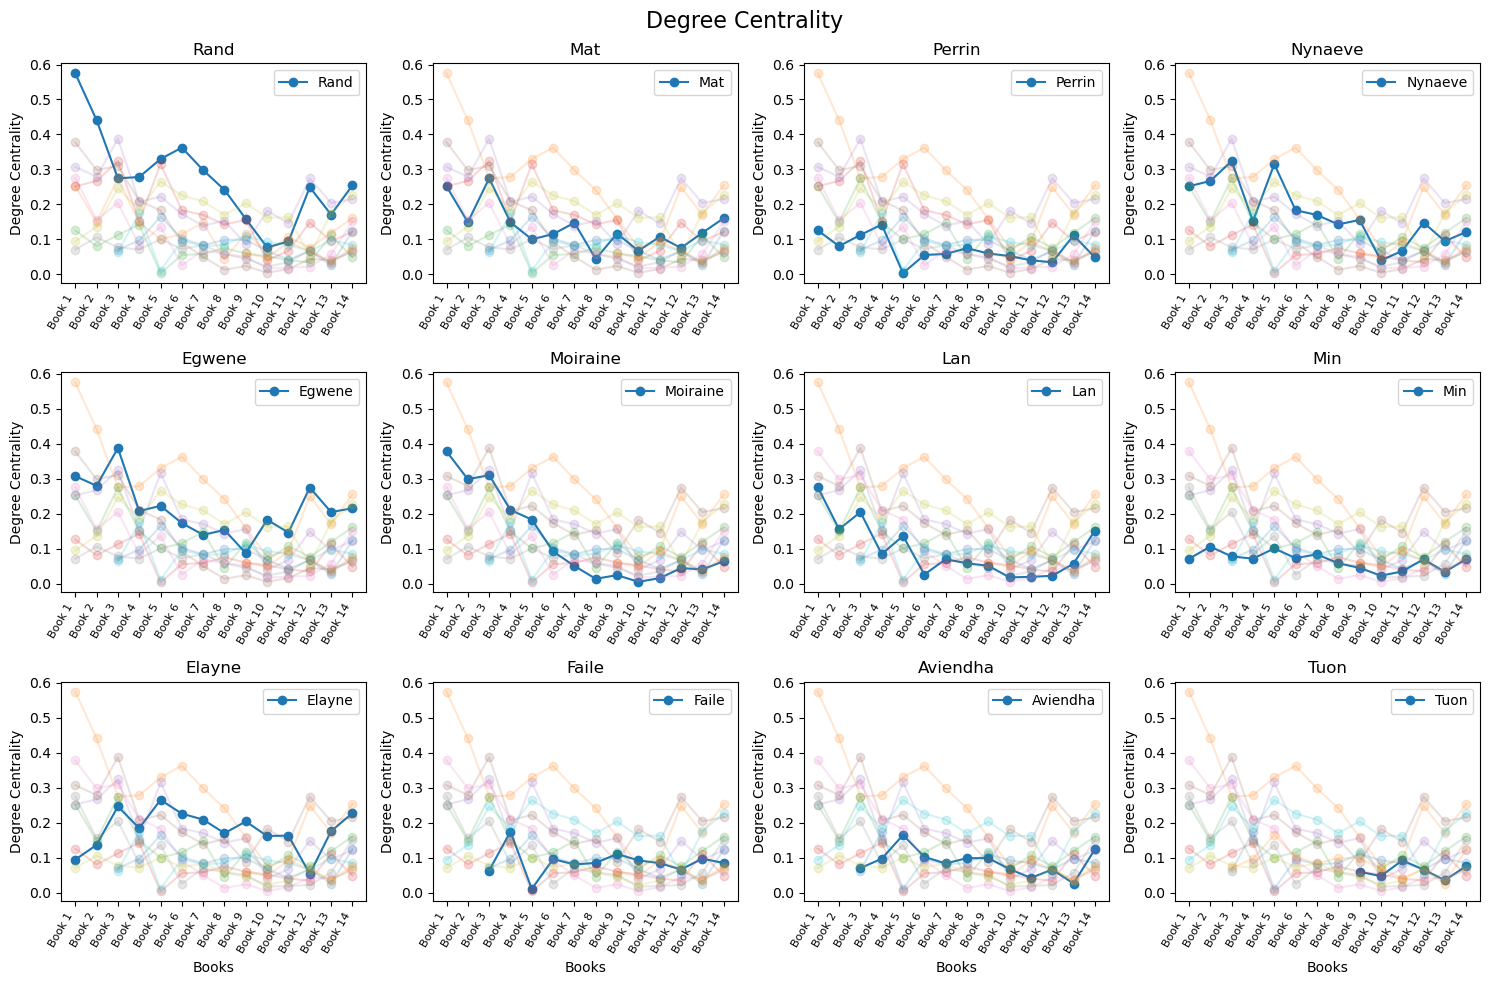

In [103]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

axes = axes.flatten()

for i, character in enumerate(main_characters):
    axes[i].plot(book_labels, evol_centrality_main[character], marker='o', label=character)
    axes[i].set_title(character)
    axes[i].set_ylabel('Degree Centrality')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].set_xticks(range(len(book_labels)))
    axes[i].set_xticklabels(book_labels, rotation=60, ha="right", fontsize=8)
    
    
    if i >= len(main_characters) - 4:
        axes[i].set_xlabel('Books')

    for j, other_character in enumerate(main_characters):
        if other_character != character:
            axes[i].plot(book_labels, evol_centrality_main[other_character], marker='o', label=other_character, alpha=0.18)

fig.suptitle('Degree Centrality', fontsize=16)
plt.tight_layout()
plt.show()


Betweeness Centrality

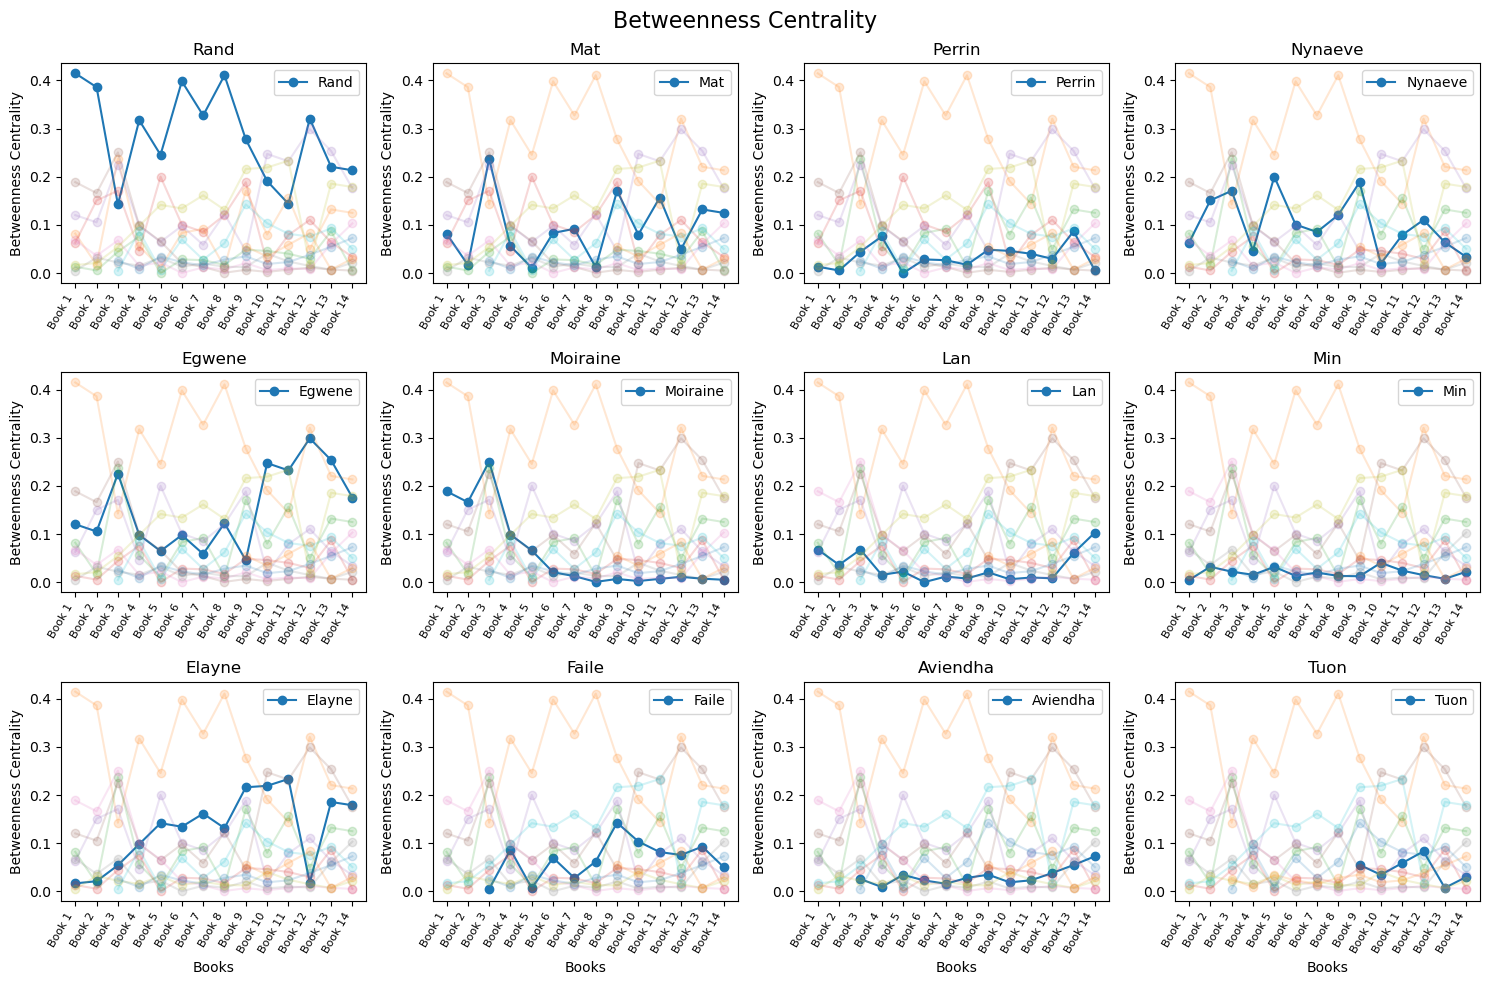

In [104]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

axes = axes.flatten()

for i, character in enumerate(main_characters):
    axes[i].plot(book_labels, evol_betweenness_main[character], marker='o', label=character)
    axes[i].set_title(character)
    axes[i].set_ylabel('Betweenness Centrality')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].set_xticks(range(len(book_labels)))
    axes[i].set_xticklabels(book_labels, rotation=60, ha="right", fontsize=8)
    
    
    if i >= len(main_characters) - 4:
        axes[i].set_xlabel('Books')

    for j, other_character in enumerate(main_characters):
        if other_character != character:
            axes[i].plot(book_labels, evol_betweenness_main[other_character], marker='o', label=other_character, alpha=0.18)

fig.suptitle('Betweenness Centrality', fontsize=16)
plt.tight_layout()
plt.show()

Closeness Centrality

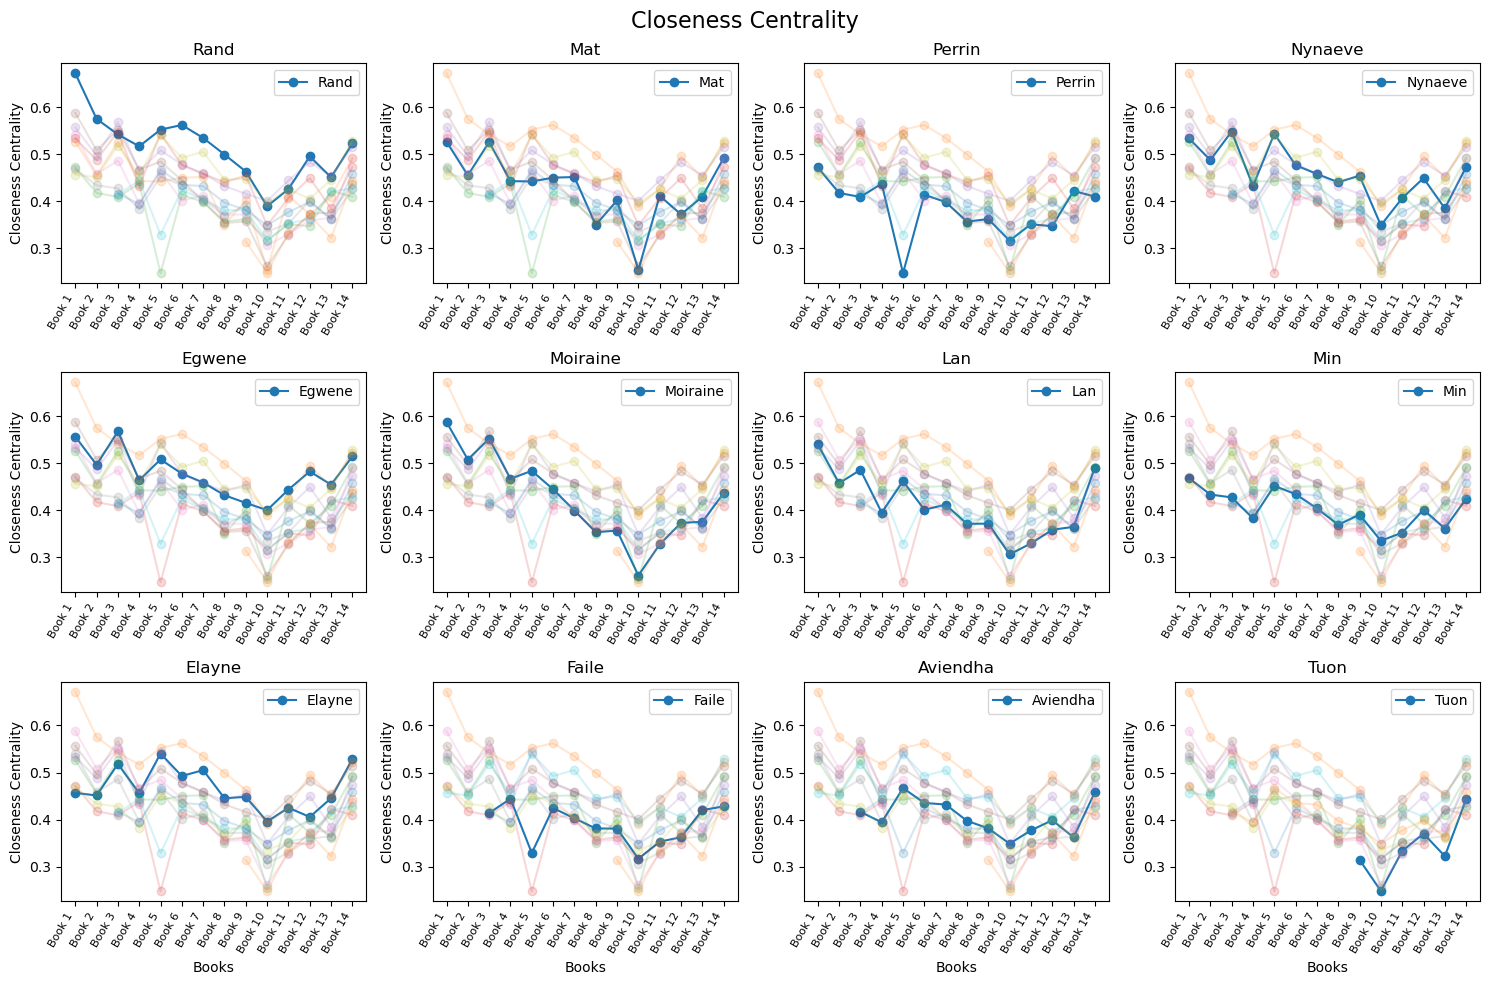

In [105]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

axes = axes.flatten()

for i, character in enumerate(main_characters):
    axes[i].plot(book_labels, evol_closeness_main[character], marker='o', label=character)
    axes[i].set_title(character)
    axes[i].set_ylabel('Closeness Centrality')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].set_xticks(range(len(book_labels)))
    axes[i].set_xticklabels(book_labels, rotation=60, ha="right", fontsize=8)
    
    
    if i >= len(main_characters) - 4:
        axes[i].set_xlabel('Books')

    for j, other_character in enumerate(main_characters):
        if other_character != character:
            axes[i].plot(book_labels, evol_closeness_main[other_character], marker='o', label=other_character, alpha=0.18)

fig.suptitle('Closeness Centrality', fontsize=16)
plt.tight_layout()
plt.show()

Eigenvector Centrality

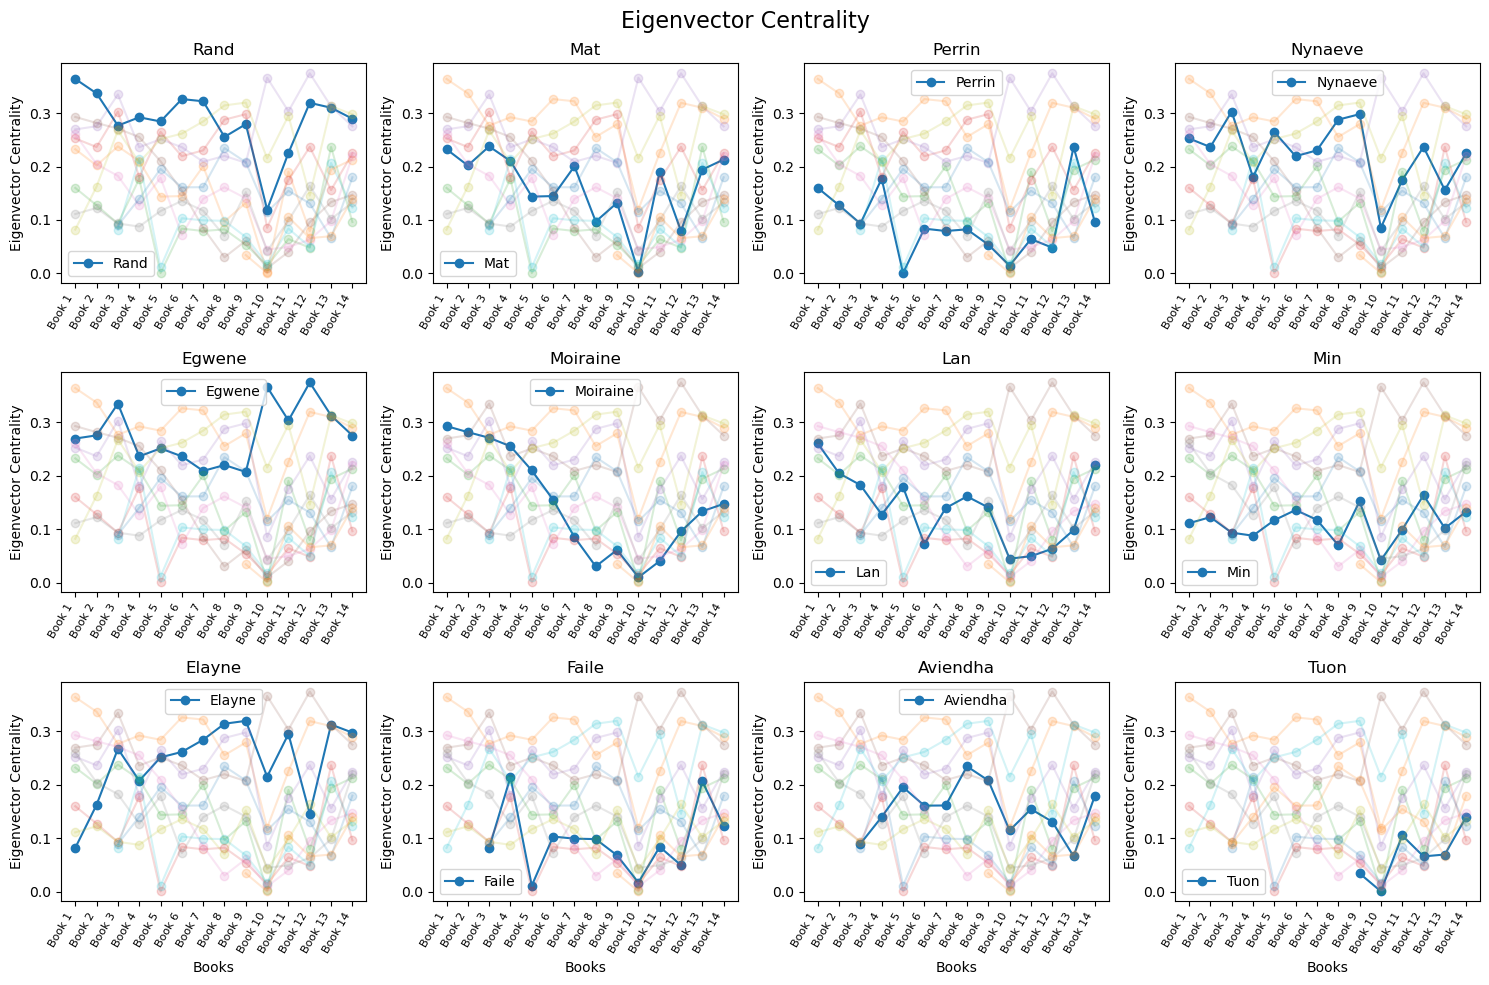

In [106]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

axes = axes.flatten()

for i, character in enumerate(main_characters):
    axes[i].plot(book_labels, evol_eigen_main[character], marker='o', label=character)
    axes[i].set_title(character)
    axes[i].set_ylabel('Eigenvector Centrality')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].set_xticks(range(len(book_labels)))
    axes[i].set_xticklabels(book_labels, rotation=60, ha="right", fontsize=8)
    
    
    if i >= len(main_characters) - 4:
        axes[i].set_xlabel('Books')

    for j, other_character in enumerate(main_characters):
        if other_character != character:
            axes[i].plot(book_labels, evol_eigen_main[other_character], marker='o', label=other_character, alpha=0.18)

fig.suptitle('Eigenvector Centrality', fontsize=16)
plt.tight_layout()
plt.show()